In [1]:
import pandas as pd

from utils import load_parquet_to_df_list, z_normalize
from approximation.paa import PAA


path = "../../../0_data/UCRArchive_2018/SwedishLeaf/train"
df_list = load_parquet_to_df_list(path)

# concatenate all time series in list to one dataframe, because they all have the same size
# do not show labels of time series
df_norm = pd.concat([z_normalize(df["signal"].to_frame()) for df in df_list], axis=1).iloc[:-3,:2]

In [2]:
paa = PAA(window_size=3)

In [3]:
transformed = paa.transform(df_norm)
transformed

,signal,signal
0,2.043930,1.730780
1,1.456989,1.249179
2,0.998597,0.826470
3,0.590927,0.453697
4,0.127083,0.226699
5,-0.197585,0.020566
6,-0.577111,-0.062830
7,-0.638988,-0.197118
8,-0.763714,-0.309871
9,-0.953490,-0.486367


In [4]:
inv = paa.inv_transform(transformed,df_norm.shape[0])
inv

,signal,signal
0,2.04393,1.73078
1,2.04393,1.73078
2,2.04393,1.73078
3,1.456989,1.249179
4,1.456989,1.249179
...,...,...
120,1.010613,0.861797
121,1.010613,0.861797
122,1.010613,0.861797
123,1.446551,1.238683


<AxesSubplot: >

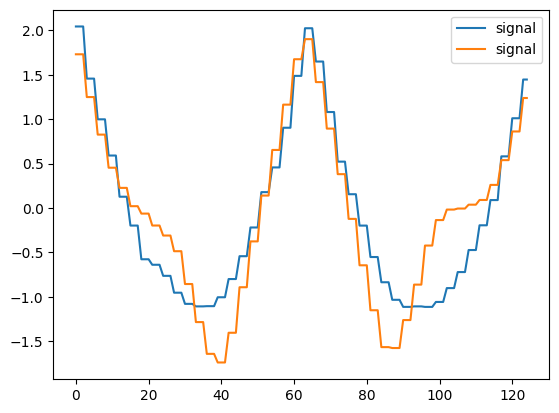

In [5]:
inv.plot()

<AxesSubplot: >

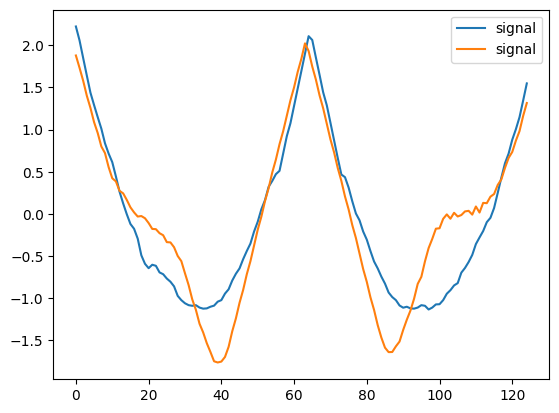

In [6]:
df_norm.plot()